Importing the Necessary Packages

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Loading the Cleaned Data

In [18]:
df = pd.read_csv('preprocessed_telecom_xdr_data.csv')
df.head()

,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.0,44.0,21.006809,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1.311448e+19,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.0,26.0,21.006809,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,1.311448e+19,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,106.199942,17.628232,6.0,9.0,21.006809,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,1.311448e+19,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,106.199942,17.628232,44.0,44.0,21.006809,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,455.940801
4,1.311448e+19,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,106.199942,17.628232,6.0,9.0,21.006809,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


Identifying Top 10 Handsets

In [19]:
# Identify the top 10 handsets
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: count, dtype: int64


Identifying Top 3 Manufacturers

In [20]:
# Identify the top 3 manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)


Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64


 Top 5 Handsets Per Top 3 Manufacturers

In [21]:
for manufacturer in top_3_manufacturers.index:
    top_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:\n{top_handsets}\n")


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9395
Apple iPhone 6 (A1586)     8993
Apple iPhone 7 (A1778)     6279
Apple iPhone Se (A1723)    5165
Apple iPhone 8 (A1905)     4977
Name: count, dtype: int64

Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4464
Samsung Galaxy A5 Sm-A520F      3700
Samsung Galaxy J5 (Sm-J530)     3675
Samsung Galaxy J3 (Sm-J330)     3456
Samsung Galaxy S7 (Sm-G930X)    3171
Name: count, dtype: int64

Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2012
Huawei P20                         1475
Huawei Y6 2018                      996
Name: count, dtype: int64



Aggregating User Behavior Data (Task 1.1)

In [22]:
agg_df = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',    # Total session duration
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()


In [23]:
agg_df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.360100e+10,1,116720.0,455.940801,36.053108,2.206504,0.025631,14.900201,6.724347,10.265105,16.915876,3.337123,1.051882,0.837400,0.493962,423.466906,1.367528,377.096990,9.473882
1,3.360100e+10,1,181230.0,120.755184,36.104459,2.598548,0.062017,5.324251,7.107972,0.770569,10.451194,4.197697,1.137166,2.828821,0.478960,105.035298,14.714780,279.557701,2.152370
2,3.360100e+10,1,134969.0,556.659663,39.306820,3.148004,0.047619,2.137272,19.196298,16.525919,2.827981,3.343483,0.099643,2.436500,0.768880,529.068485,9.759228,495.086501,6.607171
3,3.360101e+10,1,49878.0,401.993172,20.327526,0.251469,0.028825,4.393123,2.584198,1.157362,0.784730,5.937765,3.740728,2.178618,0.106052,388.074835,3.051292,25.248001,10.031701
4,3.360101e+10,2,37104.0,1363.130417,94.280527,2.861230,0.051312,10.339971,31.193031,24.971647,24.230077,13.728668,4.770948,2.247808,0.612155,1308.981093,5.816727,777.643713,27.160771


In [24]:
agg_df.shape

(106471, 19)

Task 1.2

In [25]:
print(agg_df.describe())

       MSISDN/Number      Bearer Id     Dur. (ms)  Total DL (Bytes)  \
count   1.064710e+05  106471.000000  1.064710e+05     106471.000000   
mean    4.515611e+10       1.394802  1.465715e+05        606.231593   
std     2.894643e+12       0.806994  1.865627e+05        439.095992   
min     3.360100e+10       1.000000  7.142000e+03          8.827082   
25%     3.365088e+10       1.000000  7.239950e+04        314.987403   
50%     3.366365e+10       1.000000  1.031370e+05        533.540867   
75%     3.368345e+10       2.000000  1.727990e+05        767.078946   
max     8.823971e+14      18.000000  1.855375e+07       7811.295382   

       Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
count     106471.000000            106471.000000            106471.000000   
mean          55.776419                 2.385217                 0.043738   
std           34.265875                 1.782542                 0.032695   
min            2.866892                 0.000012    

1. Variable Transformations

Segment users into the top five decile classes based on total session duration.
Compute total data (DL + UL) per decile class.

In [26]:
# Segment users into top five decile classes based on total session duration
agg_df['Total_Duration'] = agg_df['Dur. (ms)']
agg_df['Total_Data_Volume'] = agg_df['Total DL (Bytes)'] + agg_df['Total UL (Bytes)']

# Create deciles based on total duration
agg_df['Duration_Decile'] = pd.qcut(agg_df['Total_Duration'], q=5, labels=False)

# Compute total data per decile class
decile_data = agg_df.groupby('Duration_Decile').agg({
    'Total_Data_Volume': 'sum',
    'Total_Duration': 'mean'
}).reset_index()

print(decile_data)


   Duration_Decile  Total_Data_Volume  Total_Duration
0                0       1.101929e+07    30515.998685
1                1       1.185824e+07    79483.529038
2                2       1.115863e+07   106891.725755
3                3       1.333926e+07   161667.168921
4                4       2.310924e+07   355885.055462


2. Basic Metrics (Mean, Median, etc.)


In [27]:
# Analyze basic metrics for key columns
basic_metrics = agg_df[['Total_Duration', 'Total_Data_Volume', 'Total DL (Bytes)', 'Total UL (Bytes)']].describe()

# Display basic metrics
print(basic_metrics)

# Interpretation: Mean, median, min, max, and std help us understand the spread and central tendencies of key variables,
# which is essential for detecting anomalies and understanding user behavior.


       Total_Duration  Total_Data_Volume  Total DL (Bytes)  Total UL (Bytes)
count    1.064710e+05      106471.000000     106471.000000     106471.000000
mean     1.465715e+05         662.008012        606.231593         55.776419
std      1.865627e+05         465.175118        439.095992         34.265875
min      7.142000e+03          33.249009          8.827082          2.866892
25%      7.239950e+04         357.539024        314.987403         36.401961
50%      1.031370e+05         580.369003        533.540867         45.241996
75%      1.727990e+05         816.155123        767.078946         62.582428
max      1.855375e+07        8495.065797       7811.295382        704.612199


3. Non-Graphical Univariate Analysis

In [28]:
# Dispersion parameters (variance, std)
dispersion_params = agg_df[['Total_Duration', 'Total_Data_Volume', 'Total DL (Bytes)', 'Total UL (Bytes)',
                            'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                            'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                            'Other DL (Bytes)', 'Other UL (Bytes)']].agg(['var', 'std'])

print(dispersion_params)

# Interpretation: The standard deviation indicates the average deviation from the mean,
# while variance shows how spread out the data points are. A higher variance indicates greater disparity in data usage.


     Total_Duration  Total_Data_Volume  Total DL (Bytes)  Total UL (Bytes)  \
var    3.480563e+10      216387.890517     192805.289944       1174.150181   
std    1.865627e+05         465.175118        439.095992         34.265875   

     Social Media DL (Bytes)  Social Media UL (Bytes)  Youtube DL (Bytes)  \
var                 3.177454                 0.001069          134.560517   
std                 1.782542                 0.032695           11.600022   

     Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
var          119.586235          134.682882          119.728093   
std           10.935549           11.605295           10.942033   

     Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
var          32.739034           4.191100          3.201414          0.217256   
std           5.721803           2.047218          1.789250          0.466107   

     Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
var    

4. Graphical Univariate Analysis

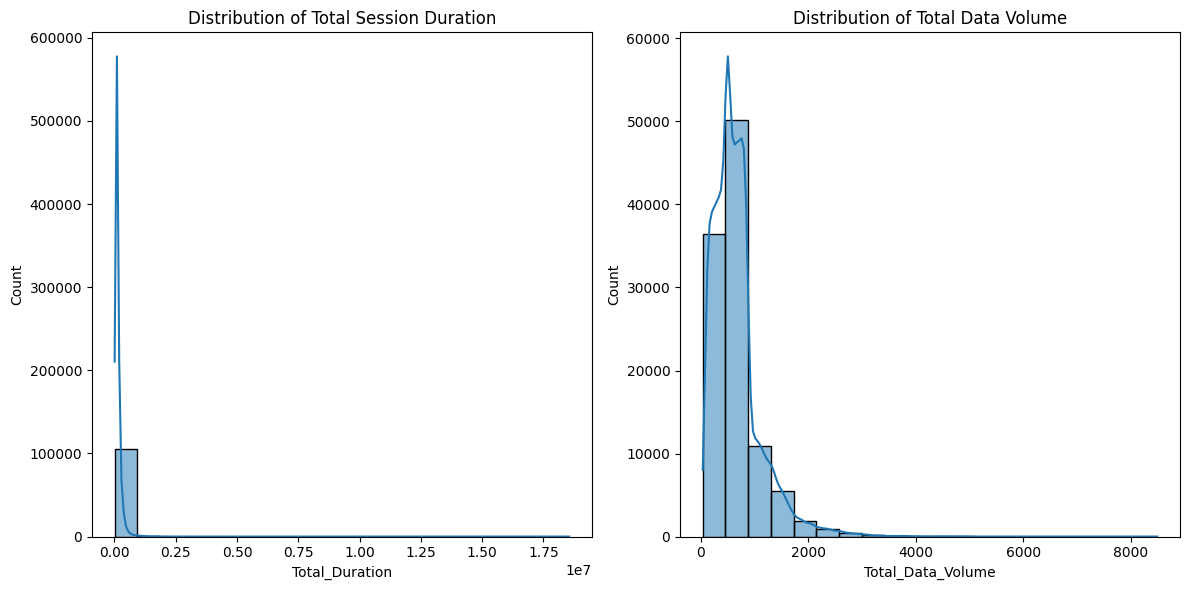

In [29]:

# Plot histograms for data volume and session duration
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(agg_df['Total_Duration'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Total Session Duration')
sns.histplot(agg_df['Total_Data_Volume'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Total Data Volume')

plt.tight_layout()
plt.show()

# Interpretation: Histograms provide insights into the distribution of session duration and total data volume.
# A right-skewed distribution may indicate that a few users have significantly longer sessions or higher data usage.


5. Bivariate Analysis

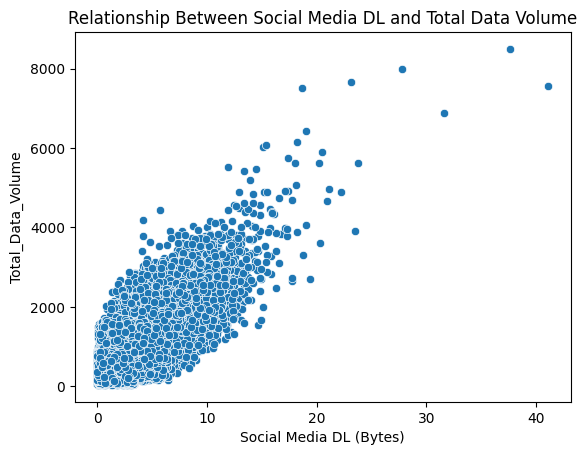

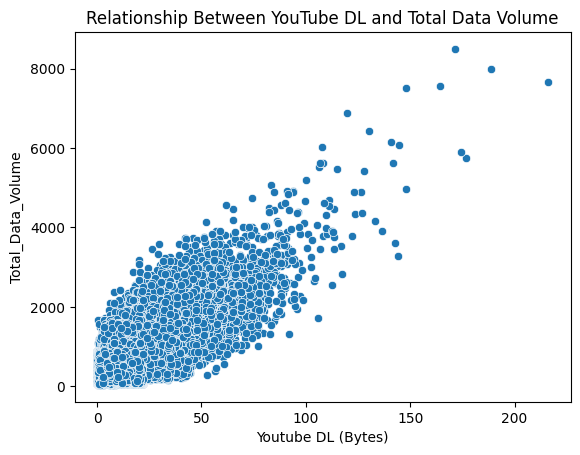

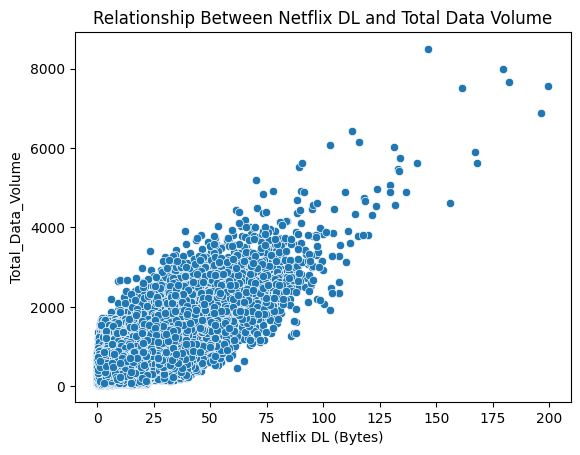

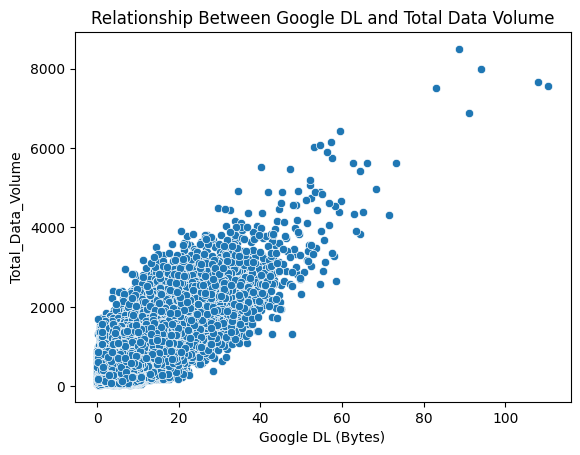

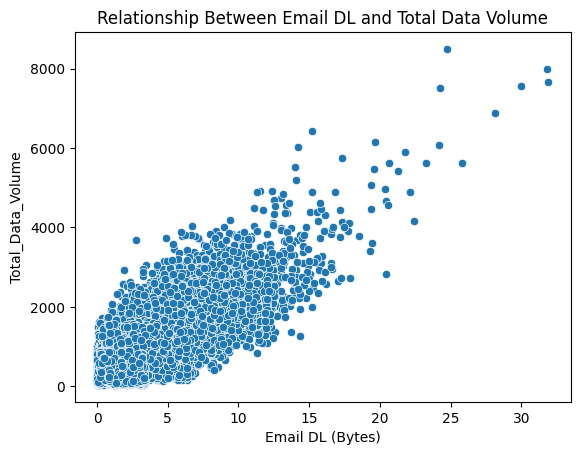

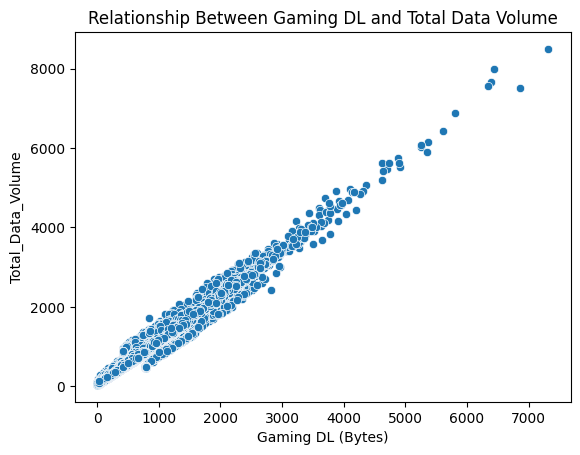

In [30]:
# Scatter plot for relationship between Social Media data and total data
sns.scatterplot(data=agg_df, x='Social Media DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Social Media DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Youtube DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between YouTube DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Netflix DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Netflix DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Google DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Google DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Email DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Email DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Gaming DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Gaming DL and Total Data Volume')
plt.show()

# Interpretation: Scatter plots reveal the relationships between each application's data usage and the total data volume.
# Strong correlations are visualized by tight clustering of points.


6. Correlation Analysis

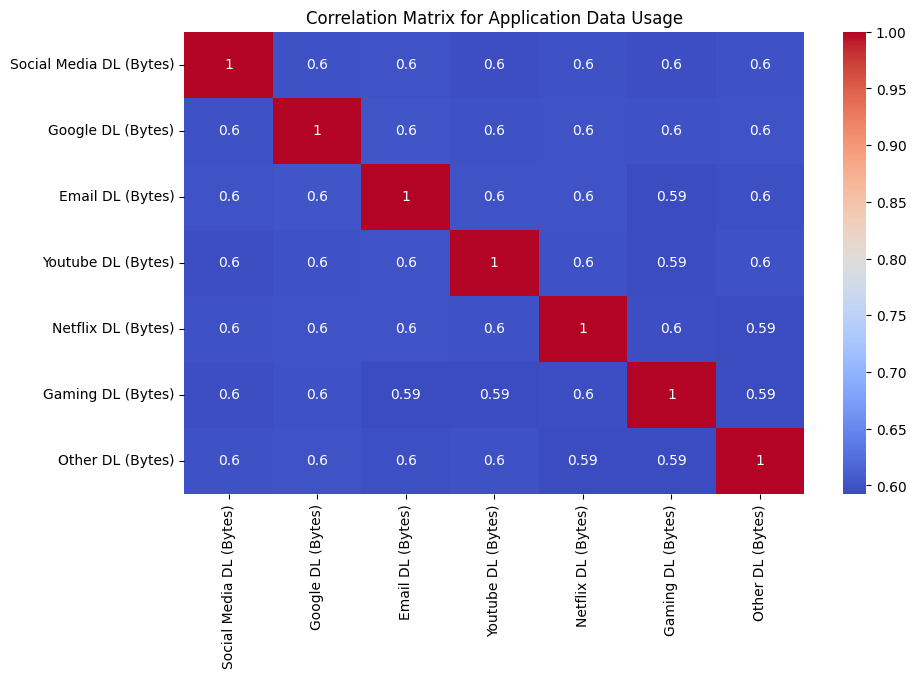

In [31]:
# Compute correlation matrix
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 
               'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

corr_matrix = agg_df[app_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Application Data Usage')
plt.show()

# Interpretation: The correlation matrix shows the degree of association between different applications' data usage.
# Strong positive correlations suggest that users tend to use multiple services together.


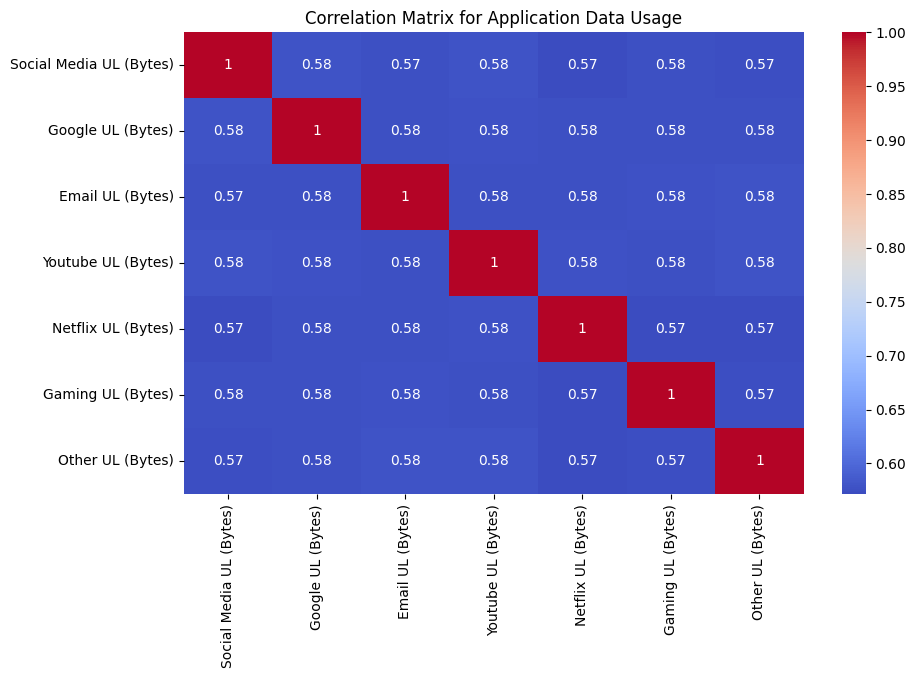

In [37]:
# Compute correlation matrix
app_columns = ['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 
               'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

corr_matrix = agg_df[app_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Application Data Usage')
plt.show()


In [32]:
# Dimensionality Reduction - PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_df[['Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 
                                           'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 
                                           'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Interpretation of PCA
print("Explained variance by components:", pca.explained_variance_ratio_)

Explained variance by components: [0.68222742 0.07565067]
